# Linear Regression with Statsmodels and Scikit-Learn

Let's investigate the housing dataset with linear regression. We'll use two different packages and you can see examples for linear regression of each:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Intro to Scikit-Learn

Scikit-learn is a machine learning package for python that includes a huge array of models including linear regression. Scikit-learn includes a number of sample data sets including the Boston housing data set. (We could also load the data with pandas as in the last lesson.)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
data = datasets.load_boston()

print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a minute to see what the data looks like.

In [2]:
print data.feature_names
print data.data[0]
print data.target[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


Scikit-learn has already split off the house value data into the target variable. Let's see how to build a linear regression. First let's put the data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM and LSTAT. Let's look at each individually and then both together.

Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems).

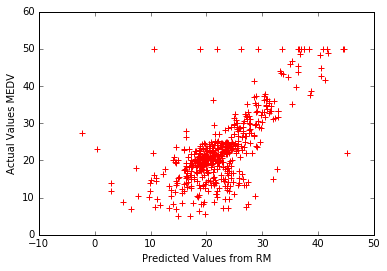

MSE: 43.6005517712


In [4]:
lm = linear_model.LinearRegression()

X = df[["RM"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

**Check**: How does this plot relate to the model? In other words, how are the independent variable (RM) and dependent variable ("MEDV") incorporated?

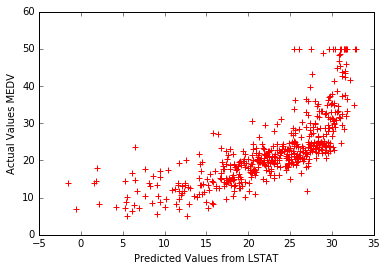

MSE: 38.4829672299


In [5]:
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

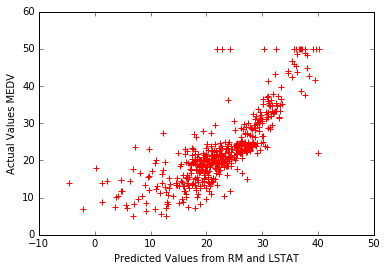

MSE: 30.5124687773


In [6]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

## Intro to Statsmodels

Now let's see how to use another popular package for regressions.

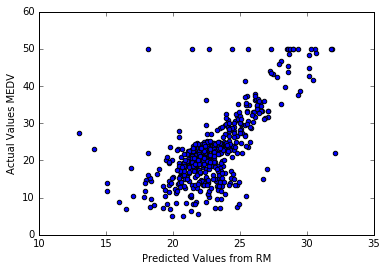

MSE: 58.4106354321


In [33]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Guided Practice

Compare this to the analgous fit from scikit-learn above.

### Exercises

Recreate the model fits above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

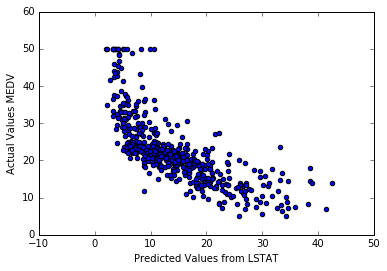

MSE: 326.480644353


In [34]:
X = df["LSTAT"]
y = targets["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.scatter(predictions, y)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

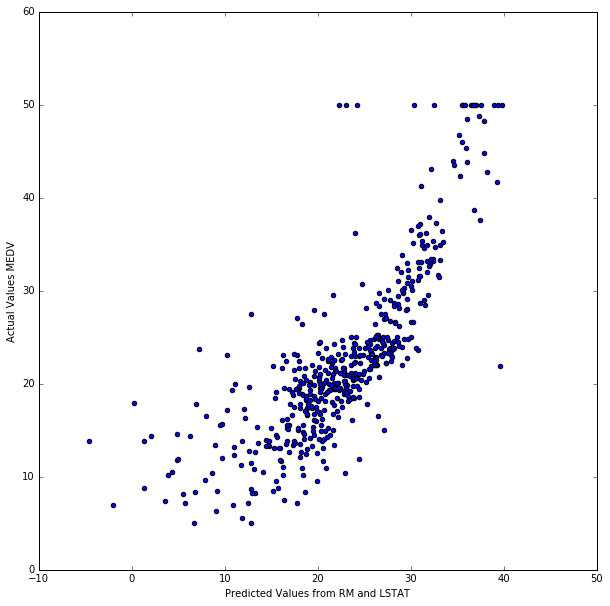

MSE: 30.5235858483


In [35]:
X = df[['RM','LSTAT']]
y = targets["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(predictions, y)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

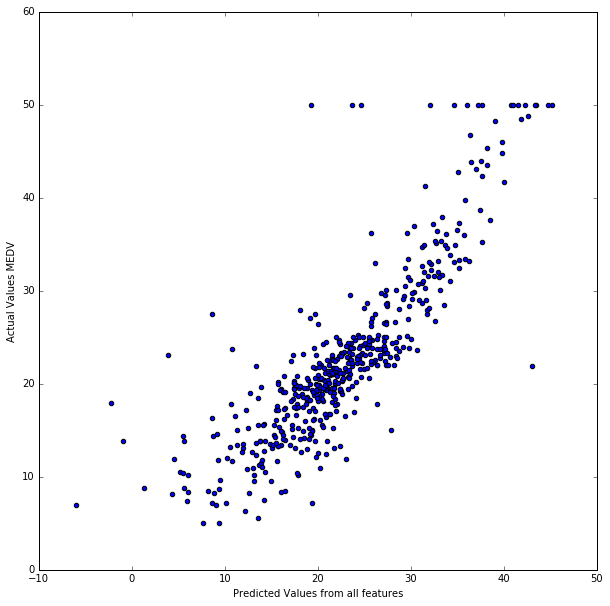

MSE: 24.1723662959


In [37]:
X = df
y = targets["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(predictions, y)
plt.xlabel("Predicted Values from all features")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Independent Practice

Using our preference of `scikit-learn` or `statsmodels`, try to find the best models that you can that:
* use only two variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

In [52]:
cols = pd.DataFrame(df.columns, columns=['attribute'])
cols

best2 = []
best3 = []
best4 = []

for itemx in cols.attribute:
    for itemy in cols.attribute:
        best2.append([itemx,itemy])
        for itemz in cols.attribute:
            best3.append([itemx,itemy,itemz])
            for itemq in cols.attribute:
                best4.append([itemx,itemy,itemz,itemq])

[['CRIM', 'CRIM', 'CRIM'],
 ['CRIM', 'CRIM', 'ZN'],
 ['CRIM', 'CRIM', 'INDUS'],
 ['CRIM', 'CRIM', 'CHAS'],
 ['CRIM', 'CRIM', 'NOX'],
 ['CRIM', 'CRIM', 'RM'],
 ['CRIM', 'CRIM', 'AGE'],
 ['CRIM', 'CRIM', 'DIS'],
 ['CRIM', 'CRIM', 'RAD'],
 ['CRIM', 'CRIM', 'TAX'],
 ['CRIM', 'CRIM', 'PTRATIO'],
 ['CRIM', 'CRIM', 'B'],
 ['CRIM', 'CRIM', 'LSTAT'],
 ['CRIM', 'ZN', 'CRIM'],
 ['CRIM', 'ZN', 'ZN'],
 ['CRIM', 'ZN', 'INDUS'],
 ['CRIM', 'ZN', 'CHAS'],
 ['CRIM', 'ZN', 'NOX'],
 ['CRIM', 'ZN', 'RM'],
 ['CRIM', 'ZN', 'AGE'],
 ['CRIM', 'ZN', 'DIS'],
 ['CRIM', 'ZN', 'RAD'],
 ['CRIM', 'ZN', 'TAX'],
 ['CRIM', 'ZN', 'PTRATIO'],
 ['CRIM', 'ZN', 'B'],
 ['CRIM', 'ZN', 'LSTAT'],
 ['CRIM', 'INDUS', 'CRIM'],
 ['CRIM', 'INDUS', 'ZN'],
 ['CRIM', 'INDUS', 'INDUS'],
 ['CRIM', 'INDUS', 'CHAS'],
 ['CRIM', 'INDUS', 'NOX'],
 ['CRIM', 'INDUS', 'RM'],
 ['CRIM', 'INDUS', 'AGE'],
 ['CRIM', 'INDUS', 'DIS'],
 ['CRIM', 'INDUS', 'RAD'],
 ['CRIM', 'INDUS', 'TAX'],
 ['CRIM', 'INDUS', 'PTRATIO'],
 ['CRIM', 'INDUS', 'B'],
 ['CRIM', 

In [58]:
def getMSE(columns):
    X = df[columns]
    y = targets["MEDV"]
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # plt.figure(figsize=(10,10))
    # plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
    # plt.xlabel("Predicted Values from RM and LSTAT")
    # plt.ylabel("Actual Values MEDV")
    # plt.show()
    return mean_squared_error(y, predictions)

In [75]:
import sys
bestscore = ['items', sys.maxint]

for item in best2:
    mse = getMSE(item)
    if mse < bestscore[1]:
        bestscore = [item, mse]
print 'Best 2: ' + str(bestscore[0]) + ' with mse of ' + str(bestscore[1])

for item in best3:
    mse = getMSE(item)
    if mse < bestscore[1]:
        bestscore = [item, mse]
print 'Best 3: ' + str(bestscore[0]) + ' with mse of ' + str(bestscore[1])

for item in best4:
    mse = getMSE(item)
    if mse < bestscore[1]:
        bestscore = [item, mse]
print 'Best 4: ' + str(bestscore[0]) + ' with mse of ' + str(bestscore[1])

Best 2: ['LSTAT', 'RM'] with mse of 30.5235858483
Best 3: ['RM', 'PTRATIO', 'LSTAT'] with mse of 28.3470869952
Best 4: ['RM', 'PTRATIO', 'B', 'LSTAT'] with mse of 26.7896897307


# Bonus Exercises

From the LSTAT plot you may have noticed that the relationship is not quite linear. Add a new column `"LSTAT2"` to your data frame for the LSTAT values squared and try to fit a quadratic function using `["LSTAT", "LSTAT2"]`. Is the resulting fit better or worse?

In [79]:
df['LSTAT2'] = df.LSTAT ** 2
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.4089
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,27.1441
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,154.5049
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,366.7225
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,895.8049
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,292.4100
